In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
df = pd.read_csv(r"dataset\company_01_merge_sales_without_previous.csv", parse_dates=["date"], index_col="date")
df = df.sort_index()
df.dropna(inplace=True)

In [3]:
df.index

DatetimeIndex(['2077-04-01', '2077-05-01', '2077-06-01', '2077-07-01',
               '2077-08-01', '2077-09-01', '2077-10-01', '2077-11-01',
               '2077-12-01', '2078-01-01', '2078-02-01', '2078-03-01',
               '2078-04-01', '2078-05-01', '2078-06-01', '2078-07-01',
               '2078-08-01', '2078-09-01', '2078-10-01', '2078-11-01',
               '2078-12-01', '2079-01-01', '2079-02-01', '2079-03-01',
               '2079-04-01', '2079-05-01', '2079-06-01', '2079-07-01',
               '2079-08-01', '2079-09-01', '2079-10-01', '2079-11-01',
               '2079-12-01', '2080-01-01', '2080-02-01', '2080-03-01',
               '2080-04-01', '2080-05-01', '2080-06-01', '2080-07-01',
               '2080-08-01', '2080-09-01', '2080-10-01', '2080-11-01',
               '2080-12-01', '2081-01-01', '2081-02-01', '2081-03-01',
               '2081-04-01', '2081-05-01', '2081-06-01', '2081-07-01',
               '2081-08-01', '2081-09-01', '2081-10-01', '2081-11-01'],
     

In [4]:
df.columns

Index(['sales'], dtype='object')

In [5]:
# data visualization using plotly
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

df_sales = pd.read_csv(r"dataset\company_01_merge_sales_without_previous.csv")

df_sales.columns = ['date','sales']

df_sales[['Year', 'Month']] = df_sales['date'].str.split('-', expand=True)
df_sales['Year'] = df_sales['Year'].astype(int)
df_sales['Month'] = df_sales['Month'].astype(int)
nepali_months_fiscal_order = {
    4: "Shrawan", 5: "Bhadra", 6: "Asoj", 7: "Kartik",
    8: "Mangsir", 9: "Poush", 10: "Magh", 11: "Falgun",
    12: "Chaitra", 1: "Baishakh", 2: "Jestha", 3: "Ashadh"
}

df_sales['Month_Name'] = df_sales['Month'].map(nepali_months_fiscal_order)


df_sales['Fiscal_Year'] = df_sales.apply(lambda row: 
                                         f"{row['Year']}-{row['Year']+1}" if row['Month'] >= 4 
                                         else f"{row['Year']-1}-{row['Year']}", axis=1)

df_sales['Month_Order'] = df_sales['Month'].apply(lambda x: list(nepali_months_fiscal_order.keys()).index(x))

df_sales = df_sales.sort_values(by=['Fiscal_Year', 'Month_Order'])

fig = go.Figure()

fiscal_years = df_sales['Fiscal_Year'].unique()

for fy in fiscal_years:
    df_fy = df_sales[df_sales['Fiscal_Year'] == fy]
    fig.add_trace(go.Scatter(
        x=df_fy['Month_Name'], 
        y=df_fy['sales'], 
        mode='lines+markers',
        name=f'Fiscal Year {fy}',
        line=dict(shape='spline')  
    ))

fig.update_layout(
    title="Sales Trend by Fiscal Year",
    xaxis_title="Nepali Month",
    yaxis_title="Sales",
    xaxis=dict(categoryorder='array', categoryarray=list(nepali_months_fiscal_order.values())),
    template="plotly_dark",
    hovermode="x unified"
)

pyo.iplot(fig)


ACF values are : 
0 1.0
1 0.21642290366356062
2 -0.19878211954193756
3 -0.20194572036817451
4 -0.04332738238924328
5 0.12294703598312849
6 -0.029605836487117333
7 0.07983701014694891
8 -0.09553039359457056
9 -0.2257657556810469
10 -0.12500378283051955
11 0.27739044017082604
PACF values are : 
0 1.0
1 0.2203578655483527
2 -0.2677009204190133
3 -0.10959487837332409
4 -0.02067034087310491
5 0.08936844238303855
6 -0.14318020586878555
7 0.19922793403375788
8 -0.22855617266309364
9 -0.17812592407178146
10 -0.10348664538699581
11 0.4237356035395459
12 0.4749241642284218
13 0.3636380561472342
14 -0.367009049838005
15 -0.13959428201102073
16 -0.09216393102313981
17 -0.21880755727454107
18 -0.294902530744473
19 -0.15039694944693474
20 -0.06577453603059946
21 0.012509402092472512
22 -0.11060669660747975
23 -0.4959655361634876
The PACF values are : 
0 1.0
1 0.2203578655483527
2 -0.2677009204190133
3 -0.10959487837332409
4 -0.02067034087310491
5 0.08936844238303855
6 -0.14318020586878555
7 0.199227

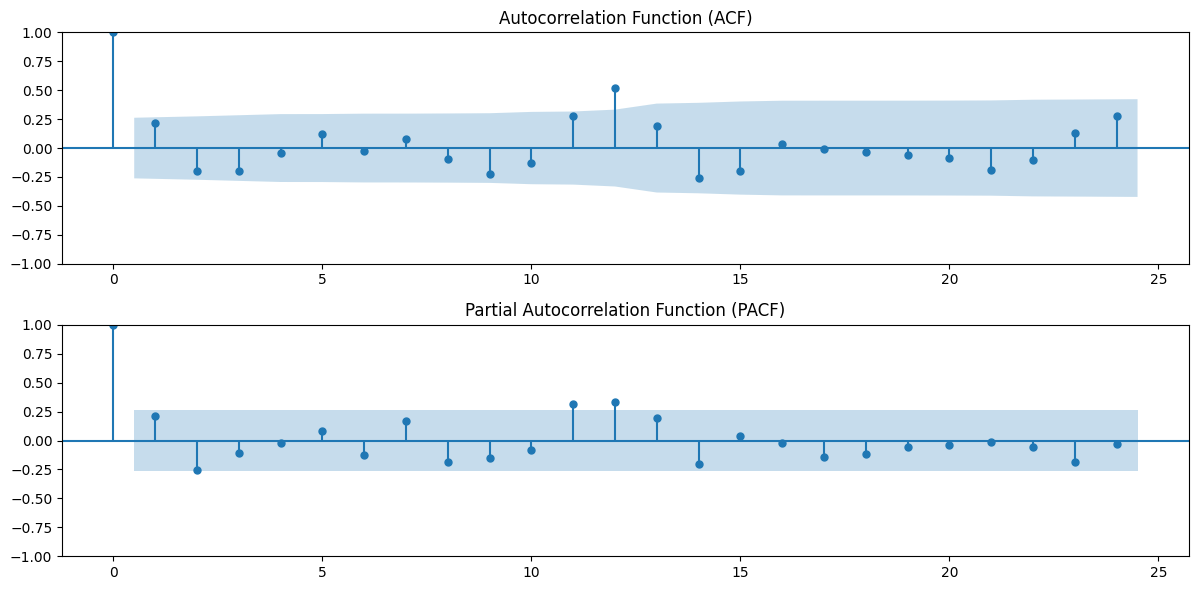

In [6]:
# analyzing auto_correlation and partial auto correlation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Calculate the ACF and PACF

acf_values = acf(df["sales"], nlags=24, fft=False)
pacf_values = pacf(df["sales"], nlags=24)

# # Print ACF and PACF values
print("ACF values are : ")
for i in range (0,12):
    print(i,acf_values[i])
    
print("PACF values are : ")
for i in range (0,24):
    print(i,pacf_values[i])

print("The PACF values are : ")
for i in range (0, 24):
    print(i, pacf_values[i])
    pass

# Plot the ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_acf(df["sales"], lags=24, ax=plt.gca())  
plt.title("Autocorrelation Function (ACF)")

plt.subplot(2, 1, 2)
plot_pacf(df["sales"], lags=24, ax=plt.gca())  
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()




In [7]:
print("ACF values are : ")
print(acf_values)

ACF values are : 
[ 1.          0.2164229  -0.19878212 -0.20194572 -0.04332738  0.12294704
 -0.02960584  0.07983701 -0.09553039 -0.22576576 -0.12500378  0.27739044
  0.52163955  0.19431739 -0.25901866 -0.19798334  0.03657908 -0.00710949
 -0.03607994 -0.06274711 -0.08826605 -0.19260168 -0.10282076  0.13178859
  0.2798436 ]


In [8]:
print("PACF values are : ")
print(pacf_values)

PACF values are : 
[ 1.          0.22035787 -0.26770092 -0.10959488 -0.02067034  0.08936844
 -0.14318021  0.19922793 -0.22855617 -0.17812592 -0.10348665  0.4237356
  0.47492416  0.36363806 -0.36700905 -0.13959428 -0.09216393 -0.21880756
 -0.29490253 -0.15039695 -0.06577454  0.0125094  -0.1106067  -0.49596554
 -0.22852558]


In [9]:
# # Feature Engineering Dynamically
# acf_features=[]
# pacf_features=[]
# for i in range (1,len(acf_values)):
#     if abs(acf_values[i]>0.3):
#         index = i
#         lag = f"lag_{index}"
#         acf_features.append(lag)

# for i in range (1,len(pacf_values)):
#     if abs(pacf_values[i]>0.3):
#         index = i
#         lag = f"lag_{index}"
#         pacf_features.append(lag)
        
# merge = list(set(acf_features+pacf_features))
# merge.sort()
# print(merge)


In [10]:
df["year"] = df.index.year
df["month"] = df.index.month
df["quarter"] = df.index.quarter

In [11]:
df["year"] = df.index.year
df["month"] = df.index.month
df["quarter"] = df.index.quarter
df["lag_1"] = df["sales"].shift(1)
df["lag_2"] = df["sales"].shift(2)
df["lag_11"] = df["sales"].shift(11)
df["lag_12"] = df["sales"].shift(12)
# df["lag_24"] = df["sales"].shift(24)

df["rolling_mean_3"] = df["sales"].rolling(window=3).mean()
df["rolling_mean_6"] = df["sales"].rolling(window=6).mean() 


df.dropna(inplace=True)

In [12]:
# Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
X_train, y_train = train.drop(columns=["sales"]), train["sales"]
X_test, y_test = test.drop(columns=["sales"]), test["sales"]

In [13]:
# Standardization
scaler_X = StandardScaler()
scaler_y = StandardScaler()
# scaler_X = MinMaxScaler()
# scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [14]:
from sklearn.model_selection import GridSearchCV

# # Hyperparameter Tuning
param_grid = {
    "n_estimators": [100, 250, 500],  
    "max_depth": [3, 7, 10],  
    "min_samples_split": [5, 10, 15],  
    "min_samples_leaf": [3, 5, 10]  
}


In [15]:
#Hyperparameter Tuning and cross-validation using Grid Search Technique
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=True)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


KeyboardInterrupt: 

In [ ]:
# # Random Forest Model
# rf_model = RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=42, n_jobs=-1, verbose=1)
# rf_model.fit(X_train_scaled, y_train_scaled)
# yran_pred_scaled = rf_model.predict(X_test_scaled)
# yran_pred = scaler_y.inverse_transform(yran_pred_scaled.reshape(-1, 1)).flatten()

In [ ]:
# #
y_pred_scaled = grid_search.predict(X_test_scaled)
yran_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()

In [ ]:
# Random Forest Metrics
mae_rf = mean_absolute_error(y_test, yran_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, yran_pred))
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")

In [ ]:
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, yran_pred)
print(f"Random Forest R² Score: {r2_rf:.4f}")


In [ ]:
df.index

In [ ]:
df['sales']

In [ ]:
test.index

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df['sales'], label="Actual Data", color="black", linewidth=1)
plt.plot(test.index, yran_pred, label="Random Forest Forecast", color="red", linestyle="dashed", linewidth=3)
plt.title("Random Forest of company 01 from 2077-2081")
plt.xlabel("Years")
plt.ylabel("Monthly Sales")
plt.legend()
plt.show()

### XG boost

In [ ]:

# XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=6,
                             subsample=0.8, colsample_bytree=0.8, random_state=42, eval_metric="rmse")
xgb_model.fit(X_train_scaled, y_train_scaled, eval_set=[(X_test_scaled, y_test_scaled)], verbose=True)
yxg_pred_scaled = xgb_model.predict(X_test_scaled)
yxg_pred = scaler_y.inverse_transform(yxg_pred_scaled.reshape(-1, 1)).flatten()


In [ ]:
# XGBoost Metrics
mae_xgb = mean_absolute_error(y_test, yxg_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, yxg_pred))
print(f"XGBoost MAE 2077-2081: {mae_xgb:.2f}")
print(f"XGBoost RMSE 2077-2081: {rmse_xgb:.2f}")


In [ ]:
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, yxg_pred)
print(f"XG boost R² Score 2077-2081: {r2_rf:.4f}")

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["sales"], label="Actual Sales", color="black", linewidth=2)

plt.plot(X_test.index, yxg_pred, label="XGBoost Forecast", color="blue", linestyle="dashed", linewidth=2)
plt.title("sales Forecasting using XG boost from 2077-2081 data")
plt.legend()
plt.show()



### Comparision from Random Forest and XG boost from 2074-2081 data and Visualizing them

Random Forest                           XG Boost
1. MAE random: 86684694.75   ----------------             1. MAE xgb: 89519934.83
2. RMSE random: 106753684.67 ----------------            2. RMSE xgb: 113117043.91
3. R2 score random: 0.4578-----------------             3. R2_score xgb: 0.3912

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(df.index[:-(len(X_test))], df["sales"][:-(len(X_test))], label="Actual Sales (Train)", color="black", linestyle="solid", linewidth=2)
plt.plot(df.index[-(len(X_test)):], df["sales"][-(len(X_test)):], label="Test Data", color="green", linestyle="solid", linewidth=2)
plt.plot(X_test.index, yran_pred, label="Random Forest Forecast", color="red", linestyle="dashed", linewidth=2 )
plt.plot(X_test.index, yxg_pred, label="XG Boost Forecast", color="blue", linestyle="dashed", linewidth=2)
plt.title("Comparision of Random Forest and XG boost performance from 2074-2081 data for company 01 i.e. HDL")
plt.xlabel("Date")
plt.ylabel("Month wise Sales")
plt.legend()
plt.show()

In [ ]:
# visualization
plt.figure(figsize=(10,9))
plt.plot(df.index,df["sales"], label="Actual", color="black", linestyle="solid", linewidth=2 )
plt.plot(X_test.index)

In [ ]:
X_test.index

In [ ]:
df["sales"].head()

In [ ]:
df.index[-(len(X_test)):]